In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

%matplotlib inline

#??matplotlib.use('Agg')
from datascience import Table
#not quite right from datascience.predicates import are 
# not this either import datascience.predicates
datasite="http://courses.demog.berkeley.edu/mason88/data/"
quizsite="http://courses.demog.berkeley.edu/mason88/cgi-bin/quiz.py"

def cquiz(qno) :
    import IPython
    try :
        sid
    except NameError :
        print ('HEY! did you enter your sid way up at the top of this notebook?')

    Linkit='<a href="{0}?qno={1}&sid={2}" target="_quiz"> >>>>CLICK for Quiz<<<< </a>'.format(quizsite,qno,sid)
    return(IPython.display.HTML(Linkit))
    
    
###
# put your student id in the obvious place below
###
sid=""

if sid == "" :
    print("HEY! didn't I tell you to put your sid in the obvious place")


HEY! didn't I tell you to put your sid in the obvious place


## With whom are you working today?

As usual this is not for grading purposes.

In [319]:
cquiz('mariel-01partners')

# The Mariel Boatlift: a "*Natural Experiment*"

This week and next, we will explore the labor market effects of the Mariel Boatlift.  David Card (world famous economist who happens to teach at Berkeley) saw the boatlift as a "natural experiment" -- in which the supply of labor in Miami was increased suddenly, unexpectedly and in some important ways : randomly.  In his famous 1990 paper,  "The Impact of the Mariel Boatlift on the Miami Labor Market", Card sets out to measure the impact of this labor market change on wages and employment status of pre-boatlift residents of Miami.

This week and next, we will first replicate and then modestly extend Card's paper.  Of course, this would be an excellent time to have **already** read the paper -- which is avaialable on jstor as well as at: [http://davidcard.berkeley.edu/papers/mariel-impact.pdf]

The key substantive issue is whether and to what extent an increase in the labor supply leads to a reduction in wages of those previously resident.  This is precisely the question that we addressed in our discussion of simple neoclassical model of immigration depicted in this all too familiar app: http://shiny.demog.berkeley.edu/carlm/EconImmig0/.

The key technical challenge is to bootstrap a statistic that is  more complicated than a mean -- and the incorporation of sample weights. 

The steps involved are:
1. Recreate tables 1, 3 and 4 of Card's famous paper.
1. Draw some graphs to illustrate the quantities in question.
2. Use the bootstrap to verify of Card's regression based test and compare the outcomes.
3. Use bootstrap to test the effects on the labor market disagregated by education and occupation -- tests which are not part of the original paper.

The data that we will use is of course the "same" as that used by Professor Card: the "Outgoing Rotation Groups" from the Current Population Survey (CPS). The CPS is a venerable survey which has been constantly conducted since unemployment was invented in the 1930s.  The survey is done every month by the Census Burea for the Burea of Labor Statistics and its purpose is to measure unemployment.  To do so  it asks a series of questions which come down to: "Do you have a job" and if not "Are you looking for one".  The latter determines whether or not the respondent is "in the labor force" and the former whether or not the person is employed. 

Of course, because surveys of this sort are quite expensive, the CPS does not merely ask the Employed?/Looking? questions but rather administers an impressive battery of questions on a wide range of topics including things closely related to employment such as  education and occupation, but also on topics of broader  interest to academics and policy makers-- such as computer and internet use; health insurance; tobacco use; veteran status; migration and civic engagement. Most of these questions are contained in what are known as monthly "supplements" to the "base survey" (which is concerned with employment).  Best of all, lots these data are available through IPUMS http://ipums.org. The data for this lab, however, were downloaded originally from the NBER site which makes the data available in a form much closer to what Professor Card used back in the Twentieth Century.
http://http://www.nber.org/data/morg.html.

The "outgoing rotation groups" (ORG) refers to the way the survey is conducted: each month a new group of respondents is selected. Each group is then polled for four consecutive months; then left alone for next eight months; and then polled again for four months. The income and employment questions in which we are interested, are asked *only* in the fourth and eighth interviews. This all means that:

1. Each respondent (household) is asked these questions two times during their 16 months of survey participation.
2. Each month only one fourth of the respondents are asked these questions.


In [55]:
# Read the data -- "morg" stands of "merged outgoing rotation groups" which are a subset of the data collected in 
# Current Population Survey

morg=Table.read_table(datasite+"morgClean.csv")

# and add the variable lnWage for log of hourly wage
morg=morg.with_column('lnWage',np.log(morg['Earnhr']))
morg

year,age,sex,EthRace,Educ,SMSA,class,Earnhr,Labf,Occupation,Unemp,esr,SelfEmployed,Earnwt,Weight3,lnWage
1979,56,2,NonHisp:white,13,LA-LongBeach,1,nan,True,Clerical,0,1,False,581.165,565.41,nan
1979,54,1,NonHisp:white,12,LA-LongBeach,3,nan,True,More Skilled Service Wrks,0,1,False,585.795,592.78,nan
1979,23,1,NonHisp:white,13,LA-LongBeach,1,11.3776,True,Transportation Operatives,0,1,False,584.448,563.823,2.43164
1979,21,2,NonHisp:white,12,LA-LongBeach,1,4.0017,True,Clerical,0,1,False,600.214,585.407,1.38672
1979,26,1,NonHisp:white,12,LA-LongBeach,1,12.0619,True,Clerical,0,1,False,615.096,590.453,2.49005
1979,27,1,NonHisp:white,12,LA-LongBeach,1,nan,False,Craftsmen,nan,4,False,621.214,590.453,nan
1979,51,2,NonHisp:white,14,LA-LongBeach,6,nan,True,Managers,0,1,True,557.721,585.217,nan
1979,54,1,NonHisp:white,12,LA-LongBeach,6,nan,True,Managers,0,1,True,562.312,572.053,nan
1979,25,1,NonHisp:white,14,LA-LongBeach,6,nan,True,Managers,0,1,True,635.56,619.837,nan
1979,17,2,NonHisp:white,11,LA-LongBeach,1,nan,False,Operatives,nan,5,False,594.488,577.88,nan


## Recreating Table 1

Table 1 in Card's paper,  gives some discriptive statistics for Miami in 1979 before the Mariel Boatlift happens.

Recreating it will give us a feel for both the structure of the data and the situration in Miami in 1979.

Because the CPS is responsible for producing an unemployment statistic for each and every state, county and SMSA, a *simple random sample* turns out not to be the best way to do it.  Collecting these data are expensive, and in order to be assured of having enough observations in **each** geographical area, a simple random sample would have to be very large (expensive).  The way this is avoided is with a "stratified" random sample, which is a type of "probability sample" (as described: https://www.inferentialthinking.com/chapters/08/5/sampling.html) .  To oversimplify a bit,  a stratified random sample contains a certain number of observations chosen at random from *each* geographical area of interest and then weights are calculated to adjust statistics that are calculated from those data.  In order to calculate theses weights it is necessary to know each observation's probability of selection.  In the simplest case, this is just a the number of observations collected from the aread divided by the number of inidividuals in the area who could have been selected. In the case of the CPS, the sample is stratified in many more ways besides geography, so even within a region and year the weights vary across individuals. 

The way to use weights, in the present (typical) case, is to think of them as the number of people in the universe who are *represented* by each individual in the sample.  Thus the number of people in area A =$\sum_{i\in{A}}{w_i}$ where $w_i$ is the sample weight of individual i and $i\in{A}$ indicates that individual i lives in area A.

Similarly, the weighted average of some characteristic, c, of people who live in area A would be given by: 
$$\frac{\sum_{i\in{A}}{(c_i*w_i)}}{\sum_{i\in{A}}{w_i}}$$

The above formulae are what David Card used to compute the figures in his Table 1

In [56]:
## So turning to Table 1
## Here is some code to generate the top panel
miami79=morg.where('SMSA',"Miami").where('year',1979)
# create columns of c_i * w_i  characteristic * weight
miami79.append_column('EducWT',miami79['Educ']*miami79['Weight3'])
miami79.append_column('LabfWT',miami79['Labf']*miami79['Weight3'])
# sum the c_i*w_i and the w_i  to get numerator and denominators from equation above
tab1_1=miami79.select(['EthRace','Weight3','EducWT','LabfWT']).groups('EthRace',collect=np.nansum)
tab1_1.relabel('Weight3 nansum','N')
tab1_1.append_column('EducWTM',tab1_1['EducWT nansum']/tab1_1['N'])
tab1_1.append_column('LabfWTM',tab1_1['LabfWT nansum']/tab1_1['N'])
tab1_1

EthRace,N,EducWT nansum,LabfWT nansum,EducWTM,LabfWTM
Cuban,249871,2.73485e+06,193101,10.945,0.7728
HispanNotCuban,92191.9,1.06966e+06,63022.3,11.6025,0.683598
NonHisp:black,239256,2.71848e+06,163614,11.3622,0.683846
NonHisp:other,7656.72,72233.7,3653.56,9.43403,0.477171
NonHisp:white,313425,4.01745e+06,237850,12.8179,0.758876


# What do we think of these numbers ?

Profound discussion question: How close is close enough ?


## Table 1  panel 2   (Code Required)

**Modify the code for panel 1 in order to produce panel 2 of Table 1**

Some notes:

1. 'Labf' is a True/False variable indicating whether the individual was in the labor force
2. 'age' is age in years those under 16 are not in the dataset
3. 'Educ' gives the number of years of school completed 
4. Your instructor believes that the weighted average number of years of education of non hispanic Blacks in Miami in 1979 was 11.7145.
4. When you have completed panel 2 of table 1 - click on the quiz link below to answer an easy question and get credit for your excellent work.

## Quiz please time click on the link below
http://courses.demog.berkeley.edu/mason88/cgi-bin/quiz.py?qno=mariel-01

In [58]:
cquiz('mariel-01')

## Table 1 panel 3 (Code Required )

Now construct the third panel of Table 1 -- the distribution of occupations by EthRace in Miami 1979 
Note that the caption in the Table indicates that only employed people are included -- it's not entirely clear whether that means that Self-employed are to be included (they are excluded elsewhere) There is also ambiguity about which weight to use. It turns out that there are TWO weights in the dataset:  Weight3, that we have used thus far but there is also a column called 'Earnwt' which is a very slightly different weight.

For your edification here are descriptions of the two weights from the NBER documentation:

weight:
>This is the Final Weight. The sum of the Final Weights in each monthly survey is the US non-institutional population. The CD-ROM excludes persons under 16 years of age. The outgoing rotation group includes one-fourth of that population. So one single month MORG file is one-fourth the population 16 years of age and over,and a year of MORG would sum to 3 times that population. Zero weights appear in some years, for records of unknown function. The implied two or four (1994 on) decimals on the tapes are explicit here. 1990-census-based weight for 2000-2002 are is
available as weightp.

earnwt:
>Earnings weight for all races. Used for tabulating earnings related items. Since the CD-ROM includes all persons asked earning questions, this sums to the total population each month and 12 times the population for each MORG file. This is not precisely 4 times the weight, presumably because the Census hasexternal knowledge of the size and composition of the labor force. The implied decimals on the tapes are explicit here. A BLS letter suggests that this weight is preferred for all purposes. 1990-census-based earnwt for 2000-2002 is available as earnwtp. 


Fortunately, these details don't matter very much. I have tried this using both weights and with and without the self-employed. The differences in the results are small regardless of those things. We'll use Earnwt for panel 3 of Table 1 -- just to remind us that that second weight exists.

Notes:
1. This is very similar computationally to what you have already done 
2. Your instructor believes that the proportion of employed non-hispanic white Miamians who were employed as managers in 1979 was: 0.15068483
3. Don't forget to click on the link to link to take the quiz after you compute the panel.

In [59]:
## we'll use Earnwt instead of weight3 -- just to remind ourselves that there are TWO weights
tab1_3=miami79.where('Unemp',False).select(['EthRace','Earnwt','Occupation']).groups(['EthRace','Occupation'],collect=np.nansum)
tab1_3.show(10)
#What is in the column "Earnwt nansum" ?
#### give it maybe a nicer name

# tab1_3.relabel('Earnwt nansum', ??????)

# What needs to be done in order to calculate the proportions of say workers of each EthRace group 
# in each occupation?  
# How are you going to do it?

EthRace,Occupation,Earnwt nansum
Cuban,Clerical,35407.3
Cuban,Craftsmen,28296.8
Cuban,Farm Workers,628.925
Cuban,Laborers,7714.55
Cuban,Less Skilled Service Wrks,8795.61
Cuban,Managers,13953.1
Cuban,More Skilled Service Wrks,8078.4
Cuban,Operatives,36329.6
Cuban,Professional/Technical,19695.2
Cuban,Sales,13464.1


In [61]:
# pivot table trick to reformat this table to be like the one in the paper 
# the code below assumes that the column called "Proportion" holds the proportion of
# workers in the EthRace group who practiced the particular occupation.
# this is only for display it does not change any numbes in table1_3

# uncomment next line modify if necessary
#tab1_3.pivot('EthRace','Occupation',values='Proportion',collect=np.array)

## Quiz time please  execute the link below



In [62]:
cquiz('mariel-02')

## Recreating Table 3  log(hourly wage)

Let's turn now to Table 3. Below is some code to generate an UNWEIGHTED version of the table.
Your job is to modify the code to include weights.  In this case, we certainly want to use Earnwt rather than the Weight3.


In [90]:
#for convenience a column that distinguishes Miami from the Control Cities
## here's a fancy list comprehension that produces a new variable which is either 'Miami' or 'Control' 
#morg.append_column('Miami/Control',[ x if x == 'Miami' else 'Control' for x in  morg['SMSA']])
morg.append_column('Miami',morg['SMSA'] =='Miami')
tab3_UW=morg.select(['Miami','EthRace','year','lnWage']).groups(['Miami','EthRace','year'],np.nanmean)
tab3_UW=tab3_UW.relabel('lnWage nanmean','meanLnWage')
tab3_UW.show(10)

Miami,EthRace,year,meanLnWage
False,Cuban,1979,1.79632
False,Cuban,1980,1.70961
False,Cuban,1981,1.59074
False,Cuban,1982,1.6664
False,Cuban,1983,1.51444
False,Cuban,1984,1.59408
False,Cuban,1985,1.77297
False,HispanNotCuban,1979,1.63725
False,HispanNotCuban,1980,1.61094
False,HispanNotCuban,1981,1.58639


In [91]:
# use .pivot to format tab3_UW to look more like in the paper 
# since there is ONE unique value for each category any function
# will work
print('Miami')
tab3_UW.where('Miami',True).pivot('year','EthRace',values='meanLnWage',collect= np.array).show()
print('Control')
tab3_UW.where('Miami',False).pivot('year','EthRace',values='meanLnWage',collect=np.array).show()

Miami


EthRace,1979,1980,1981,1982,1983,1984,1985
Cuban,[ 1.57164275],[ 1.53078704],[ 1.50791106],[ 1.49108711],[ 1.47783526],[ 1.52567677],[ 1.47948135]
HispanNotCuban,[ 1.5180354],[ 1.53917533],[ 1.53062283],[ 1.4989988],[ 1.4979383],[ 1.61532946],[ 1.54607018]
NonHisp:black,[ 1.57079024],[ 1.53024562],[ 1.60093198],[ 1.48328936],[ 1.46634004],[ 1.5627335],[ 1.60482155]
NonHisp:other,[ 1.46854883],[ 1.48779446],[ 1.59415529],[ 1.60368147],[ 1.46828513],[ 1.75903581],[ 1.88064167]
NonHisp:white,[ 1.8505392],[ 1.81971958],[ 1.83119816],[ 1.81330566],[ 1.79080883],[ 1.80916044],[ 1.78175627]


Control


EthRace,1979,1980,1981,1982,1983,1984,1985
Cuban,[ 1.79632342],[ 1.7096103],[ 1.59073511],[ 1.66639977],[ 1.51443649],[ 1.59407505],[ 1.77296542]
HispanNotCuban,[ 1.63725035],[ 1.61094336],[ 1.58639354],[ 1.58276967],[ 1.55929814],[ 1.57168919],[ 1.54052919]
NonHisp:black,[ 1.72760779],[ 1.69724201],[ 1.71581046],[ 1.71413471],[ 1.69466405],[ 1.6792562],[ 1.67632923]
NonHisp:other,[ 1.88093749],[ 1.78039208],[ 1.83494177],[ 1.8266476],[ 1.80299388],[ 1.80759272],[ 1.78144896]
NonHisp:white,[ 1.91238824],[ 1.88332444],[ 1.87920323],[ 1.87666716],[ 1.86023171],[ 1.86904451],[ 1.86971888]


These results, without weighting are reasonably close but we should be able to get closer to what Card found if we use   weights

## Table 3 with weights (Coding Required)

The same principles apply in Table 3 as in Table 1 as far as weights are concerned.
Below are a couple of lines to get you started. 

Notes:
1. One gotcha here is that there are some observations which have a nonzero Earnwt but for which Earnhr is missing.  I am not sure how this happens -- possibly there are people whose earnings are all from capital ? whatever the reason -- they need to be dropped when computing the denominator, $\sum{w_i}$.
2. Your instructor believes that the weighted mean log hourly wage of of Non-Hispanic whites in Miami in 1983 was 1.779269 



In [92]:
# Table 3 with weights
# create a new column containing Earnhr multiplied by the weight variable
morg.append_column('lnWageWTD',np.log(morg['Earnhr'])*morg['Earnwt'])
# create new column indicating quality of Earnhr because there are observations with positive Earnwt and
# nan for Earnhr
morg.append_column('GoodWageDat',~np.isnan(morg['Earnhr']))


In [72]:
cquiz("mariel-04")

## How much difference do the weights make?

Discuss the histogram below


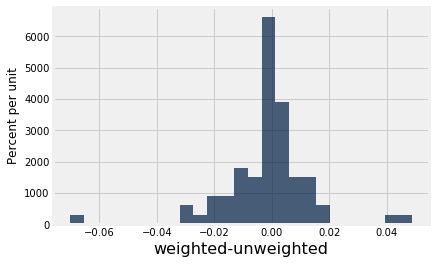

In [73]:
## Comparing the values with and without weights

# assuming you're result from above is called tab3
Table().with_column('weighted-unweighted',tab3['meanLnWage']-tab3_UW['meanLnWage']).hist(bins=25)


## Are the differences between your log wage estimates and Card's important? 

Have an important discussion about the possible sources of differences between your estimates and Card's.


To inform our discussion... you may read in the values in Card's table 3 by
executing the following cell an then creating a histogram just like the one above?


In [146]:
cardT3=Table.read_table('cardTable3.csv')
cardT3.append_column('Miami',cardT3['Miami'] =='yes')
cardT3.relabel('meanLnWage','cardMeanLnWage')
cardT3


EthRace,year,Miami,cardMeanLnWage
NonHisp:white,1979,True,1.85
NonHisp:white,1980,True,1.83
NonHisp:white,1981,True,1.85
NonHisp:white,1982,True,1.82
NonHisp:white,1983,True,1.82
NonHisp:white,1984,True,1.82
NonHisp:white,1985,True,1.82
NonHisp:black,1979,True,1.59
NonHisp:black,1980,True,1.55
NonHisp:black,1981,True,1.61


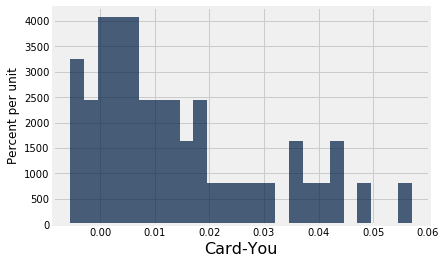

In [175]:
## This is tricky- because .join only works on a single column, in order to join cardT3 and your tab3 
## so as to match EthRace, year and Miami, we'll need to create
## a variable, called 'rdx'  which is the concatination of EthRace,year and Miami

# surprisingly THIS does NOT work:
##cardT3.append_column(rdx,cardT3['EthRace']+cardT3['year'].astype(str))

#this works:
cardT3.append_column('rdx',np.char.add(
    np.char.add(cardT3['EthRace'],cardT3['year'].astype(str)),cardT3['Miami'].astype(str)))

tab3.append_column('rdx',np.char.add(
    np.char.add(tab3['EthRace'],tab3['year'].astype(str)),tab3['Miami'].astype(str)))
t3diff=cardT3.select(['rdx','cardMeanLnWage']).join('rdx',tab3)

Table().with_column('Card-You',t3diff['cardMeanLnWage']-t3diff['meanLnWage']).hist(bins=25)



# Visualizing the effect of the Mariel Boatlift on the Miami Labor market

Click on the link below for an easy question with no wrong answer.


In [323]:
cquiz('mariel-04')

# graphs

The key question is: to what extent, if any, were workers who lived in Miami in 1979 made worse off *as a result of* the influx of Cuban immigrants in 1980.


In [204]:
morg

year,age,sex,EthRace,Educ,SMSA,class,Earnhr,Labf,Occupation,Unemp,esr,SelfEmployed,Earnwt,Weight3,lnWage,Miami/Control,lnWageWTD,GoodWageDat,Miami
1979,56,2,NonHisp:white,13,LA-LongBeach,1,nan,True,Clerical,0,1,False,581.165,565.41,nan,Control,nan,False,False
1979,54,1,NonHisp:white,12,LA-LongBeach,3,nan,True,More Skilled Service Wrks,0,1,False,585.795,592.78,nan,Control,nan,False,False
1979,23,1,NonHisp:white,13,LA-LongBeach,1,11.3776,True,Transportation Operatives,0,1,False,584.448,563.823,2.43164,Control,1421.17,True,False
1979,21,2,NonHisp:white,12,LA-LongBeach,1,4.0017,True,Clerical,0,1,False,600.214,585.407,1.38672,Control,832.329,True,False
1979,26,1,NonHisp:white,12,LA-LongBeach,1,12.0619,True,Clerical,0,1,False,615.096,590.453,2.49005,Control,1531.62,True,False
1979,27,1,NonHisp:white,12,LA-LongBeach,1,nan,False,Craftsmen,nan,4,False,621.214,590.453,nan,Control,nan,False,False
1979,51,2,NonHisp:white,14,LA-LongBeach,6,nan,True,Managers,0,1,True,557.721,585.217,nan,Control,nan,False,False
1979,54,1,NonHisp:white,12,LA-LongBeach,6,nan,True,Managers,0,1,True,562.312,572.053,nan,Control,nan,False,False
1979,25,1,NonHisp:white,14,LA-LongBeach,6,nan,True,Managers,0,1,True,635.56,619.837,nan,Control,nan,False,False
1979,17,2,NonHisp:white,11,LA-LongBeach,1,nan,False,Operatives,nan,5,False,594.488,577.88,nan,Control,nan,False,False


In [228]:
np.isnan(morg['Earnhr'])
miami79=miami79.with_column('YouthWT',(miami79['age'] <=24)*miami79['Weight3'])
tab1_2=miami79.where('Labf',True).select(['EthRace','Weight3','EducWT','YouthWT']).groups(['EthRace'],collect=np.nansum)
tab1_2.relabel('Weight3 nansum','N')
tab1_2=tab1_2.with_column('EducWTM',tab1_2['EducWT nansum']/tab1_2['N'])
tab1_2=tab1_2.with_column('YouthWTM',tab1_2['YouthWT nansum']/tab1_2['N'])
tab1_2

array([ True,  True, False, ...,  True, False, False], dtype=bool)

In [280]:
~np.isnan(morg['Earnhr'])*morg['Labf']
gvars
depvar
gvars.append(depvar)
list(morg)

['year',
 'age',
 'sex',
 'EthRace',
 'Educ',
 'SMSA',
 'class',
 'Earnhr',
 'Labf',
 'Occupation',
 'Unemp',
 'esr',
 'SelfEmployed',
 'Earnwt',
 'Weight3',
 'lnWage',
 'Miami/Control',
 'lnWageWTD',
 'GoodWageDat',
 'Miami',
 'Good',
 'Clean']

In [334]:
def wtdMean(data,depvar,gvars=['Miami','year'],wvar='Earnwt'):

    """
    given a dataset (generally morg) a dependent variable e.g. lnWage and weight (Earnwt)
    returns a table with one row for each unique combination of gvars holding the weighted
    mean of depvar
    """
    allvars=gvars.copy()
    allvars.append(depvar)
    allvars.append(wvar)
    #get rid of stuff we don't need
    dset=data.select(allvars)
    #get rid of stuff we don't want
    dset=dset.where(~np.isnan(dset[wvar]))
    dset=dset.where(~np.isnan(dset[depvar]))
    dset.append_column(depvar+'WTD',dset[depvar]*dset[wvar])
    result=dset.groups(gvars,collect=np.nansum)
    result.append_column(depvar+"WTDmean",result[depvar+ 'WTD'' nansum']/result[wvar+' nansum'])
    
    return(result.drop([depvar+" nansum",depvar+"WTD"+" nansum"]))

In [335]:
# Example 0
# mean wage of employed people in Miami vs control towns by year
wtdMean(morg.where('Unemp',False),'Earnhr')


Miami,year,Earnwt nansum,EarnhrWTDmean
False,1979,4.15235e+06,7.14083
False,1980,4.23782e+06,6.86234
False,1981,4.32592e+06,6.85359
False,1982,4.49854e+06,6.8572
False,1983,4.39765e+06,6.72925
False,1984,4.61485e+06,6.73462
False,1985,2.39498e+06,6.63037
True,1979,501561,5.95146
True,1980,552789,5.61872
True,1981,605294,5.72133


In [336]:
# Example 1
# mean wage by EthRace by year
wtdMean(morg.where('Unemp',False),'Earnhr',gvars=['EthRace','year'])

EthRace,year,Earnwt nansum,EarnhrWTDmean
Cuban,1979,159347,5.31479
Cuban,1980,176766,5.15008
Cuban,1981,217678,4.95475
Cuban,1982,201092,4.97418
Cuban,1983,232902,4.90995
Cuban,1984,215052,5.21893
Cuban,1985,118211,5.24543
HispanNotCuban,1979,788923,5.60988
HispanNotCuban,1980,876679,5.51585
HispanNotCuban,1981,889887,5.37896


In [337]:
#Example 2
# mean wage by Miami/control, year, and Highschool graduation status
morg.append_column('HighSchool',morg['Educ']>=12)
wtdMean(morg.where('Unemp',False),'Earnhr',gvars=['Miami','year','HighSchool'])

Miami,year,HighSchool,Earnwt nansum,EarnhrWTDmean
False,1979,False,1.02672e+06,5.38679
False,1979,True,3.12563e+06,7.71701
False,1980,False,1.03438e+06,5.13447
False,1980,True,3.20344e+06,7.42026
False,1981,False,994872,5.03618
False,1981,True,3.33105e+06,7.39639
False,1982,False,981309,5.04268
False,1982,True,3.51723e+06,7.36345
False,1983,False,892323,4.78499
False,1983,True,3.50533e+06,7.22418


In [322]:
#
cquiz('mariel-05')

## Draw a scatter plot showing mean wages in Miami vs Control Cities over time



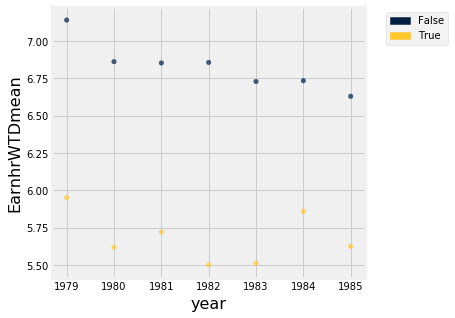

In [339]:
#Example - Earnings per hour Miami vs Control
wages=wtdMean(morg.where('Unemp',False),depvar='Earnhr',gvars=['Miami','year'])
wages.scatter('year','EarnhrWTDmean',colors='Miami')

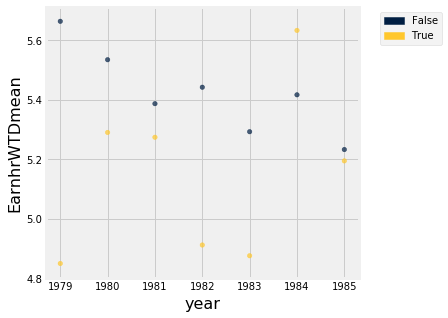

In [341]:
#Example - Earnings per hour Non Cuban hispanics Miami vs Control
wagesH=wtdMean(morg.where('Unemp',False).where('EthRace','HispanNotCuban'),depvar='Earnhr',gvars=['Miami','year'])
wagesH.scatter('year','EarnhrWTDmean',colors='Miami')


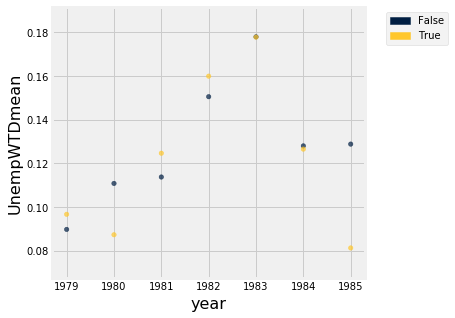

In [346]:
#Example - Unemployment rate of highschool dropouts
ueNoHS=wtdMean(morg.where('Labf',True).where('HighSchool', False),depvar='Unemp',gvars=['Miami','year'])
ueNoHS.scatter('year','UnempWTDmean',colors='Miami')